# Алгоритм HOG для распознавания лиц

Алгоритм Histogram of Oriented Gradients (HOG) широко используется для задач распознавания объектов, включая распознавание лиц. Основная идея HOG заключается в том, чтобы описать структуру и внешний вид объекта путем анализа его градиентов и направлений градиентов в изображении. Ниже описаны основные этапы и концепции алгоритма HOG.

## 1. Краткий обзор
Histogram of Oriented Gradients (HOG) — это метод, широко используемый в компьютерном зрении и машинном обучении для обнаружения объектов. Он анализирует распределение локальных градиентов ориентации (направлений) в изображении и создает вектор признаков, который описывает структуру объекта. HOG часто применяется в задачах распознавания лиц и других объектов.

## 2. Цель метода
Цель метода HOG заключается в создании компактного и информативного представления изображения, которое позволяет эффективно различать объекты на основе их локальных градиентов и структурных особенностей.

## 3. Принцип работы алгоритма
Алгоритм HOG выполняет следующие основные шаги:

1. **Предобработка изображения:** Изображение преобразуется в градации серого для уменьшения сложности и объема данных.
2. **Вычисление градиентов:** Вычисляются горизонтальные и вертикальные градиенты изображения, обычно с помощью оператора Собеля.
3. **Формирование гистограмм направлений градиентов:** Изображение разделяется на небольшие ячейки, в каждой из которых строится гистограмма направлений градиентов.
4. **Нормализация блоков:** Несколько смежных ячеек объединяются в блоки, и их гистограммы нормализуются для устойчивости к изменениям освещения.
5. **Формирование вектора признаков:** Вектора гистограмм всех блоков объединяются в единый вектор признаков для всего изображения.
6. **Классификация объектов:** Вектор признаков подается на вход классификатору (например, SVM), который определяет наличие лица на изображении.

## 4. Схема работы алгоритма
```plaintext
1. Input Image -> 2. Grayscale Conversion -> 3. Gradient Computation -> 4. Histogram of Oriented Gradients -> 5. Block Normalization -> 6. Feature Vector -> 7. Classification

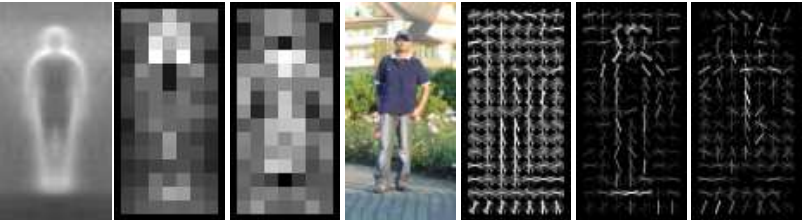

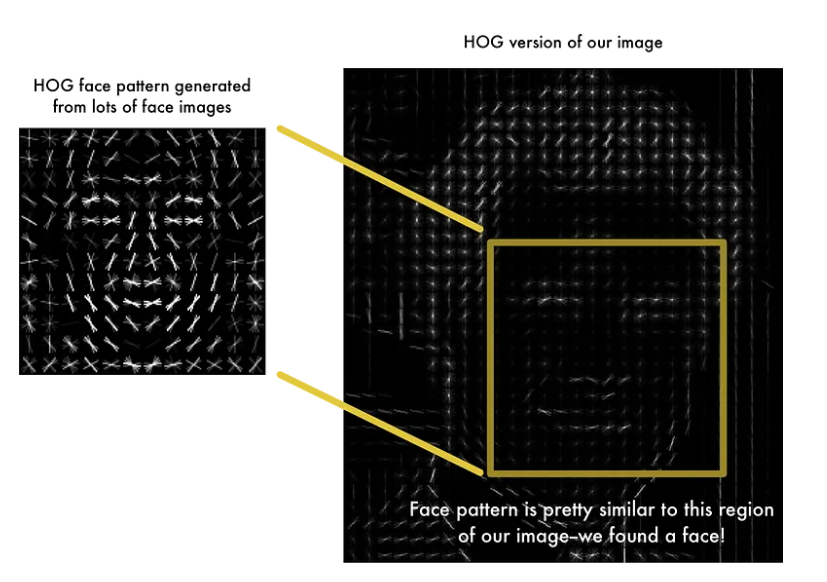

## 5. Эксперимент на открытой, готовой библиотеке
Пример кода для вычисления HOG признаков и распознавания лиц с использованием OpenCV и scikit-learn

In [5]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Загрузка датасета лиц
faces = datasets.fetch_olivetti_faces()
X = faces.images
y = faces.target

# Вычисление HOG признаков для каждого изображения
hog_features = []
for image in X:
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    hog_features.append(features)
hog_features = np.array(hog_features)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(hog_features, y, test_size=0.3, random_state=42)

# Обучение SVM классификатора
clf = LinearSVC()
clf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Davron\scikit_learn_data


c:\Users\Davron\code\seller_bot\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.99


## 6. Преимущества и недостатки
#### Преимущества
- Высокая скорость детектирования.
- Высокая точность: HOG обеспечивает высокую точность в детектировании объектов благодаря детальному описанию локальных градиентов.
- Устойчивость к изменениям освещения: Нормализация блоков делает алгоритм устойчивым к вариациям освещения и контраста.
- Простота реализации: HOG легко реализовать с использованием готовых библиотек, таких как OpenCV и scikit-learn.

#### Недостатки
- Ограничения на размер лиц: Невозможно детектировать лица с размером меньше 80х80 пикселей
- Ограниченная устойчивость к масштабированию и поворотам: HOG не всегда эффективно справляется с объектами, которые сильно меняют масштаб или поворачиваются.

## Заключение
Алгоритм HOG является мощным инструментом для распознавания лиц и других объектов благодаря своему подходу к описанию локальных особенностей изображения. Несмотря на высокие вычислительные затраты, HOG обеспечивает высокую точность и надежность, что делает его популярным выбором в области компьютерного зрения.

## Статьи по данной теме:
1. [Histograms of Oriented Gradients for Human Detection](https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf)
2. [GROUP EMOTION RECOGNITION
USING MACHINE LEARNING](https://arxiv.org/pdf/1905.01118)
3. [Implementation of HOG Feature Extraction with Tuned Parameters for Human Face Detection](https://www.researchgate.net/publication/342815187_Implementation_of_HOG_Feature_Extraction_with_Tuned_Parameters_for_Human_Face_Detection)